### HR department wants a model to be buildt which can predict the salary for a new employee when the years of experience is given

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Read data

In [4]:
dataset = pd.read_csv("C:/Users/ADMIN/Desktop/FBS/Data Science/Data sets/Salary_Data.csv")

## Perform EDA

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Count'>

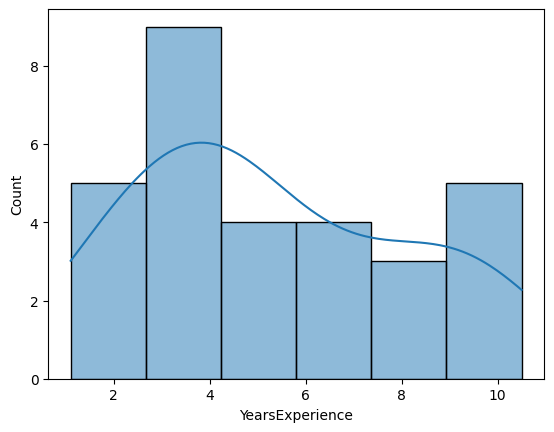

In [6]:
sns.histplot(dataset,x='YearsExperience', kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x207e0688830>,
 'caps': [<matplotlib.lines.Line2D at 0x207e0688e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x207e0688650>],
 'medians': [<matplotlib.lines.Line2D at 0x207e0689310>],
 'fliers': [<matplotlib.lines.Line2D at 0x207e06895b0>],
 'means': []}

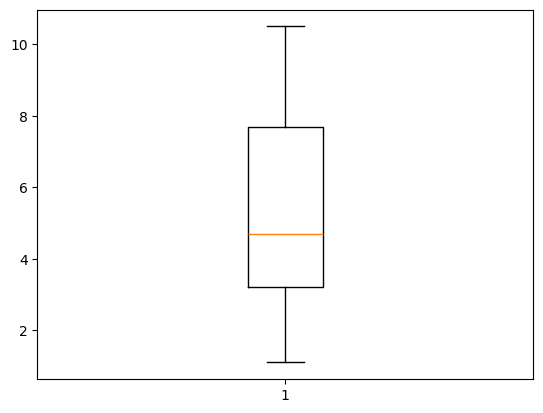

In [7]:
plt.boxplot(dataset['YearsExperience'])

In [8]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Feature selection

In [63]:
X = dataset[['YearsExperience']]
y = dataset['Salary']

In [64]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
from sklearn.model_selection import train_test_split

## Splitting training & testing data

In [70]:
X_train,X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42)

In [71]:
X_train

,YearsExperience
0,1.1
4,2.2
16,5.1
5,2.9
13,4.1
11,4.0
22,7.9
1,1.3
2,1.5
25,9.0


In [72]:
X_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7
28,10.3
24,8.7
12,4.0


## build model

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
slr = LinearRegression()   #created the model

In [75]:
slr.fit(X_train,y_train)   #training th moldel with data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


#### Find out the predictions for test data

In [76]:
test_pred = slr.predict(X_test)   
test_pred

array([115573.62288352,  71679.93878159, 102498.90847018,  75415.57147111,
        55803.4998511 ,  60473.04071301, 122110.98009019, 107168.44933209,
        63274.76523015])

In [77]:
pd.DataFrame({"input":X_test['YearsExperience'],"actual":y_test,"pred":test_pred})


,input,actual,pred
27,9.6,112635.0,115573.622884
15,4.9,67938.0,71679.938782
23,8.2,113812.0,102498.908470
17,5.3,83088.0,75415.571471
8,3.2,64445.0,55803.499851
9,3.7,57189.0,60473.040713
28,10.3,122391.0,122110.980090
24,8.7,109431.0,107168.449332
12,4.0,56957.0,63274.765230


## PREDICT SALARIES FOR TRAINING DATA

In [78]:
train_pred = slr.predict(X_train)   
train_pred

array([ 36191.42823109,  46464.41812729,  73547.75512635,  53001.77533396,
        64208.67340254,  63274.76523015,  99697.18395303,  38059.24457585,
        39927.06092062, 109970.17384923,  44596.60178252,  92225.91857398,
       114639.71471114,  81019.0205054 , 123978.79643495,  89424.19405684,
        55803.4998511 ,  62340.85705777,  67944.30609206,  81952.92867778,
        53935.68350634])

In [79]:
pd.DataFrame({"input":X_train['YearsExperience'],"actual":y_train,"pred":train_pred})

,input,actual,pred
0,1.1,39343.0,36191.428231
4,2.2,39891.0,46464.418127
16,5.1,66029.0,73547.755126
5,2.9,56642.0,53001.775334
13,4.1,57081.0,64208.673403
11,4.0,55794.0,63274.765230
22,7.9,101302.0,99697.183953
1,1.3,46205.0,38059.244576
2,1.5,37731.0,39927.060921
25,9.0,105582.0,109970.173849


### Check Accuracy

In [80]:
from sklearn.metrics import mean_absolute_percentage_error

In [81]:
mean_absolute_percentage_error(y_test,test_pred)  #test data accuracy

0.06647907533756252

In [82]:
mean_absolute_percentage_error(y_train,train_pred)  #training accuracy

0.0718211251030837

In [83]:
from sklearn.metrics import root_mean_squared_error

In [84]:
root_mean_squared_error(y_train,train_pred)  #calculate the error in output

5377.937858732068

In [85]:
from sklearn.metrics import r2_score

In [86]:
r2_score(y_test,test_pred)

0.9414466227178214

## Coeff & intercept we get after building model

In [87]:
B0 = slr.intercept_
B1 = slr.coef_

In [88]:
B0

np.float64(25918.438334893202)

In [89]:
B1

array([9339.08172382])

In [90]:
y = B0 + B1 * 3
y

array([53935.68350634])

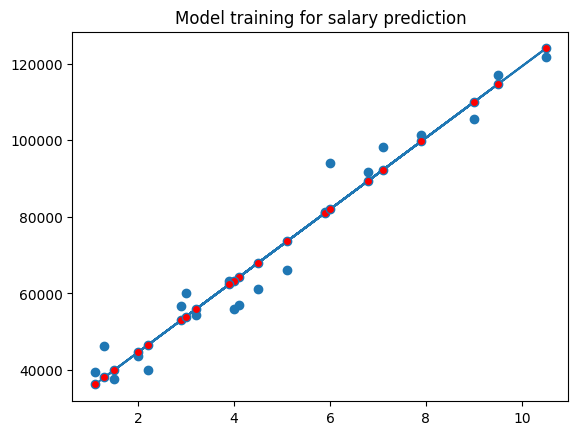

In [91]:
plt.title("Model training for salary prediction")
plt.scatter(X_train, y_train)
plt.plot(X_train,train_pred,marker="o",markerfacecolor="red")

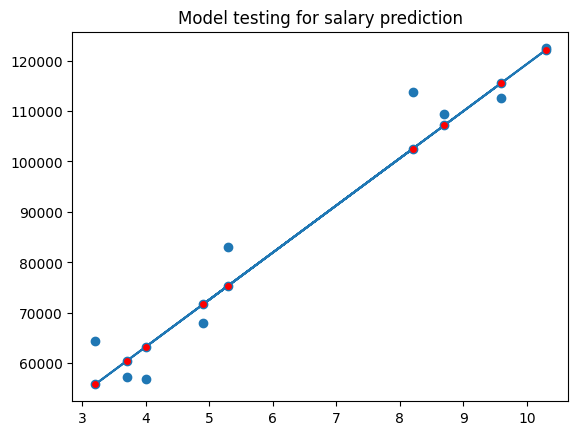

In [92]:
plt.title("Model testing for salary prediction")
plt.scatter(X_test, y_test)
plt.plot(X_test,test_pred,marker="o",markerfacecolor="red")